In [28]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd

In [29]:
d=pd.read_csv('https://raw.githubusercontent.com/roldugina/data_analysis_projects/01_height_weight/HeightsWeights.csv')

In [30]:
d.shape

(25001, 6)

In [31]:
d.head

<bound method NDFrame.head of          Index  Height(Inches)  Weight(Pounds)  Height(m)  Weight(kg)  \
0          1.0        65.78331        112.9925   1.644583   51.243764   
1          2.0        71.51521        136.4873   1.787880   61.899002   
2          3.0        69.39874        153.0269   1.734968   69.399955   
3          4.0        68.21660        142.3354   1.705415   64.551202   
4          5.0        67.78781        144.2971   1.694695   65.440862   
...        ...             ...             ...        ...         ...   
24996  24997.0        64.54826        120.1932   1.613706   54.509388   
24997  24998.0        64.69855        118.2655   1.617464   53.635147   
24998  24999.0        67.52918        132.2682   1.688230   59.985578   
24999  25000.0        68.87761        124.8742   1.721940   56.632290   
25000      NaN             NaN             NaN        NaN         NaN   

             IMT  
0      18.946525  
1      19.364523  
2      23.055577  
3      22.194439 

In [34]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25001 entries, 0 to 25000
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  float64
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
 3   Height(m)       25000 non-null  float64
 4   Weight(kg)      25000 non-null  float64
 5   IMT             25000 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


In [6]:
d.describe()

,Index,Height(Inches),Weight(Pounds),Weight(kg),IMT
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,57.632391,19.941331
std,7217.022701,1.901679,11.660898,5.288389,1.601683
min,1.000000,60.278360,78.014760,35.380844,13.490168
25%,6250.750000,66.704397,119.308675,54.108243,18.864692
50%,12500.500000,67.995700,127.157750,57.667914,19.921455
75%,18750.250000,69.272958,134.892850,61.175896,21.010776
max,25000.000000,75.152800,170.924000,77.516553,26.858548


In [9]:
d['Weight(kg)'].describe()

count    25000.000000
mean        57.632391
std          5.288389
min         35.380844
25%         54.108243
50%         57.667914
75%         61.175896
max         77.516553
Name: Weight(kg), dtype: float64

# New Section

Text(0, 0.5, 'density')

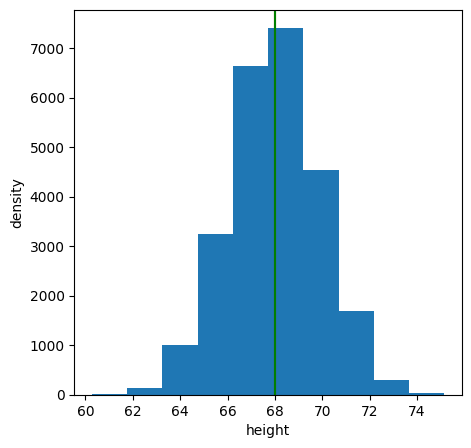

In [10]:
p=d['Height(Inches)'].plot(kind='hist',figsize=(5,5))
p.axvline(d['Height(Inches)'].mean(), color="red")
p.axvline(d['Height(Inches)'].median(), color="green")
p.set_xlabel("height")
p.set_ylabel("density")

In [11]:
d.corr()

<ipython-input-11-da7db8af9981>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d.corr()


,Index,Height(Inches),Weight(Pounds),Weight(kg),IMT
Index,1.000000,0.009626,-0.007257,-0.007257,-0.014899
Height(Inches),0.009626,1.000000,0.502859,0.502859,-0.121519
Weight(Pounds),-0.007257,0.502859,1.000000,1.000000,0.795477
Weight(kg),-0.007257,0.502859,1.000000,1.000000,0.795477
IMT,-0.014899,-0.121519,0.795477,0.795477,1.000000


In [22]:
d['Calculated_IMT']=d['Weight(kg)']/d['Height(m)']

TypeError: ignored

In [33]:
d['Height(m)'].describe()

count    25000.000000
mean         1.699828
std          0.047542
min          1.506959
25%          1.667610
50%          1.699892
75%          1.731824
max          1.878820
Name: Height(m), dtype: float64

In [32]:
d.describe()

,Index,Height(Inches),Weight(Pounds),Height(m),Weight(kg),IMT
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,1.699828,57.632391,19.941331
std,7217.022701,1.901679,11.660898,0.047542,5.288389,1.601683
min,1.000000,60.278360,78.014760,1.506959,35.380844,13.490168
25%,6250.750000,66.704397,119.308675,1.667610,54.108243,18.864692
50%,12500.500000,67.995700,127.157750,1.699892,57.667914,19.921455
75%,18750.250000,69.272958,134.892850,1.731824,61.175896,21.010776
max,25000.000000,75.152800,170.924000,1.878820,77.516553,26.858548


In [36]:
d['Calculated_IMT']=d['Weight(kg)']/d['Height(m)']/d['Height(m)']

In [37]:
d['Calculated_IMT'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25001 entries, 0 to 25000
Series name: Calculated_IMT
Non-Null Count  Dtype  
--------------  -----  
25000 non-null  float64
dtypes: float64(1)
memory usage: 195.4 KB


In [41]:
(d['Calculated_IMT']!=d['IMT']).sum()

25001

In [42]:
d['Index'].sum()

312512500.0

In [46]:
d['Index'].head()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: Index, dtype: float64

In [49]:
d['IMT'].describe()

count    25000.000000
mean        19.941331
std          1.601683
min         13.490168
25%         18.864692
50%         19.921455
75%         21.010776
max         26.858548
Name: IMT, dtype: float64

In [54]:
d['IMT'].median()

19.92145529

In [56]:
d['IMT_check']=d['IMT']!=d['Calculated_IMT']

In [57]:
d.head()

,Index,Height(Inches),Weight(Pounds),Height(m),Weight(kg),IMT,Calculated_IMT,IMT_check
0,1.0,65.78331,112.9925,1.644583,51.243764,18.946525,18.946525,True
1,2.0,71.51521,136.4873,1.787880,61.899002,19.364523,19.364523,True
2,3.0,69.39874,153.0269,1.734968,69.399955,23.055577,23.055577,True
3,4.0,68.21660,142.3354,1.705415,64.551202,22.194439,22.194439,True
4,5.0,67.78781,144.2971,1.694695,65.440862,22.785879,22.785879,True


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Height(Inches)'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Weight(Pounds)'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Height(Inches)'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Weight(Pounds)'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['index', 'Index'], ['Index', 'Height(Inches)'], ['Height(Inches)', 'Weight(Pounds)'], ['Weight(Pounds)', 'Height(m)']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['index', 'Height(Inches)', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['index', 'Weight(Pounds)', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['index', 'Height(m)', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['index', 'Weight(kg)', None], **{})
chart

<Axes: xlabel='Frequency'>

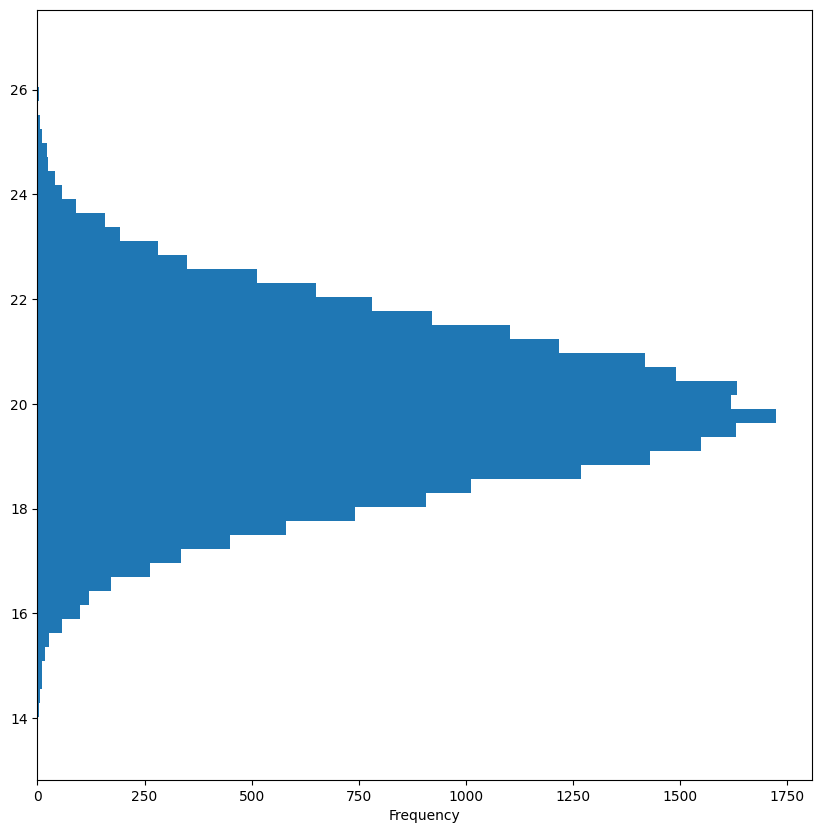

In [71]:
d['IMT'].plot(kind='hist', bins=50, figsize=(10,10),orientation='horizontal')

In [73]:
rand=np.random.randint(5,100,25000)

In [74]:
rand.head()

AttributeError: ignored